# Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.



In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
%matplotlib notebook

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [24]:
#setup date frame and put in city names
city_name=[]
country=[]
date=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiniss=[]
wind_speed=[]

city_df = pd.DataFrame({"City": city_name,
                        "Cloudiness":cloudiniss,
                        "Country": country,
                        "Date":date,
                        "Humidity": humidity,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp":max_temp,
                        "Wind Speed": wind_speed})
city_df["City"]=cities

city_df.head()


City  Cloudiness  Country  Date  Humidity  Lat  Lng  \
0             prince rupert         NaN      NaN   NaN       NaN  NaN  NaN   
1                    nabire         NaN      NaN   NaN       NaN  NaN  NaN   
2              san patricio         NaN      NaN   NaN       NaN  NaN  NaN   
3  sao gabriel da cachoeira         NaN      NaN   NaN       NaN  NaN  NaN   
4                   qaanaaq         NaN      NaN   NaN       NaN  NaN  NaN   

   Max Temp  Wind Speed  
0       NaN         NaN  
1       NaN         NaN  
2       NaN         NaN  
3       NaN         NaN  
4       NaN         NaN

# Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [25]:
#set base_url of inquire by city name
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

#start API calls
print("Beginning Data Retrieval")
print("-----------------------------")
record_num =1
for index, row in city_df.iterrows():
    city=row["City"]

    #using city names and set unit to imperial since we need degree in F
    respond = requests.get(f"{base_url}{city}&units=imperial&APPID={api_key}").json()   
    # if the website find the city, save required information in the cell of each roll
    try:
        print(f"Processing Record {index+1} | City name: {city}")
        city_df.loc[index,"Cloudiness"]=respond["clouds"]["all"]
        city_df.loc[index,"Country"]=respond["sys"]["country"]
        city_df.loc[index,"Date"]=respond["dt"]
        city_df.loc[index,"Humidity"]=respond["main"]["humidity"]
        city_df.loc[index,"Lat"]=respond["coord"]["lat"]
        city_df.loc[index,"Lng"]=respond["coord"]["lon"]
        city_df.loc[index,"Max Temp"]=respond["main"]["temp_max"]
        city_df.loc[index,"Wind Speed"]=respond["wind"]["speed"]
        
    #if the webiste cannot find the city, print below message and no information will be saved
    except:
        print(f"Record {index+1} not found. Skipping...")
        



Beginning Data Retrieval
-----------------------------
Processing Record 1 | City name: prince rupert
Processing Record 2 | City name: nabire
Processing Record 3 | City name: san patricio
Processing Record 4 | City name: sao gabriel da cachoeira
Processing Record 5 | City name: qaanaaq
Processing Record 6 | City name: hilo
Processing Record 7 | City name: dikson
Processing Record 8 | City name: albany
Processing Record 9 | City name: lugovskiy
Record 9 not found. Skipping...
Processing Record 10 | City name: calvinia
Processing Record 11 | City name: porangatu
Processing Record 12 | City name: khatanga
Processing Record 13 | City name: rikitea
Processing Record 14 | City name: leh
Processing Record 15 | City name: naifaru
Processing Record 16 | City name: nuuk
Processing Record 17 | City name: clyde river
Processing Record 18 | City name: ambulu
Processing Record 19 | City name: yellowknife
Processing Record 20 | City name: constitucion
Processing Record 21 | City name: ushuaia
Process

Processing Record 177 | City name: san cristobal
Processing Record 178 | City name: illapel
Processing Record 179 | City name: laguna
Processing Record 180 | City name: avera
Processing Record 181 | City name: aktash
Record 181 not found. Skipping...
Processing Record 182 | City name: palmer
Processing Record 183 | City name: seymchan
Processing Record 184 | City name: hattiesburg
Processing Record 185 | City name: barrow
Processing Record 186 | City name: amahai
Processing Record 187 | City name: urucara
Processing Record 188 | City name: roros
Processing Record 189 | City name: havre-saint-pierre
Processing Record 190 | City name: novaky
Processing Record 191 | City name: longyearbyen
Processing Record 192 | City name: ofunato
Processing Record 193 | City name: port alfred
Processing Record 194 | City name: barentsburg
Record 194 not found. Skipping...
Processing Record 195 | City name: chapada dos guimaraes
Processing Record 196 | City name: xining
Processing Record 197 | City name:

Processing Record 343 | City name: liusha
Processing Record 344 | City name: salinopolis
Processing Record 345 | City name: esso
Processing Record 346 | City name: baruun-urt
Processing Record 347 | City name: natchitoches
Processing Record 348 | City name: sand springs
Processing Record 349 | City name: grand river south east
Record 349 not found. Skipping...
Processing Record 350 | City name: the valley
Processing Record 351 | City name: marsa matruh
Processing Record 352 | City name: uhlove
Processing Record 353 | City name: launceston
Processing Record 354 | City name: bubaque
Processing Record 355 | City name: ondorhaan
Record 355 not found. Skipping...
Processing Record 356 | City name: hearst
Processing Record 357 | City name: saint-augustin
Processing Record 358 | City name: coihaique
Processing Record 359 | City name: pali
Processing Record 360 | City name: sofiysk
Record 360 not found. Skipping...
Processing Record 361 | City name: sterlitamak
Processing Record 362 | City nam

Processing Record 512 | City name: baykit
Processing Record 513 | City name: putevka
Processing Record 514 | City name: haibowan
Record 514 not found. Skipping...
Processing Record 515 | City name: wanaka
Processing Record 516 | City name: high level
Processing Record 517 | City name: tual
Processing Record 518 | City name: lubango
Processing Record 519 | City name: jiddah
Record 519 not found. Skipping...
Processing Record 520 | City name: podor
Processing Record 521 | City name: nerchinskiy zavod
Processing Record 522 | City name: cockburn town
Processing Record 523 | City name: tallahassee
Processing Record 524 | City name: pangnirtung
Processing Record 525 | City name: den helder
Processing Record 526 | City name: kirakira
Processing Record 527 | City name: blagoyevo
Processing Record 528 | City name: isangel
Processing Record 529 | City name: armidale
Processing Record 530 | City name: honiara
Processing Record 531 | City name: miquelon
Processing Record 532 | City name: george
Pr

# Convert Raw Data to DataFrame

* Export the city data into a .csv.
* Display the DataFrame

In [26]:
#data cleaning, drop those cities that cannot be found
city_df=city_df.dropna(how="any")
city_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [27]:
#show dataframe
city_df.head()

City  Cloudiness Country          Date  Humidity  \
0             prince rupert         1.0      CA  1.536268e+09      82.0   
1                    nabire        68.0      ID  1.536270e+09      92.0   
2              san patricio         0.0      PY  1.536270e+09      58.0   
3  sao gabriel da cachoeira        20.0      BR  1.536264e+09      83.0   
4                   qaanaaq        68.0      GL  1.536270e+09     100.0   

     Lat     Lng  Max Temp  Wind Speed  
0  54.32 -130.32     59.00        3.36  
1  -3.36  135.50     66.63        2.19  
2 -26.98  -56.83     73.47        4.21  
3  -0.13  -67.09     82.40        4.70  
4  77.48  -69.36     32.25        3.65

In [28]:
#reset index and save to a csv file
city_df.reset_index()
city_df.to_csv("Result/City_Data.csv")

# Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


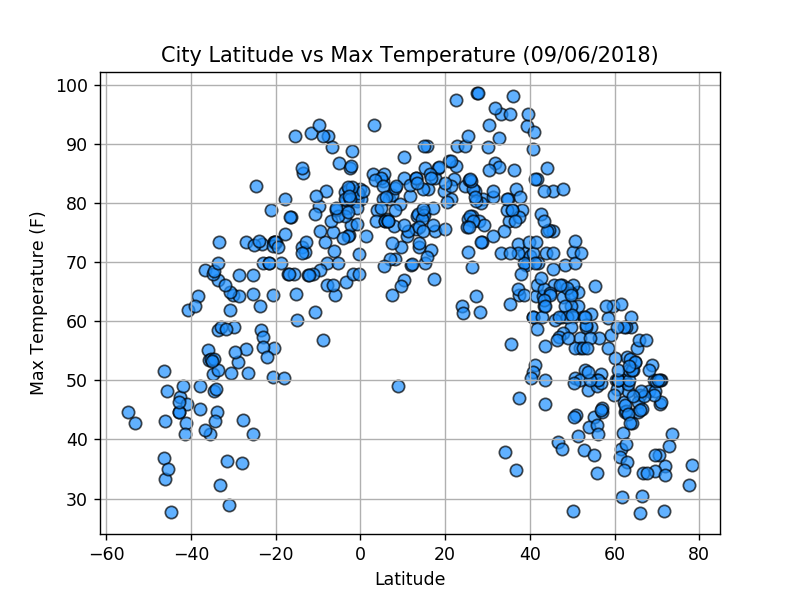

In [29]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_temp=plt.scatter(city_df["Lat"],city_df["Max Temp"],s=50,marker="o", facecolors="dodgerblue", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Max Temperature (09/06/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Result/Lat_vs_Temp.png")
plt.show()

# Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


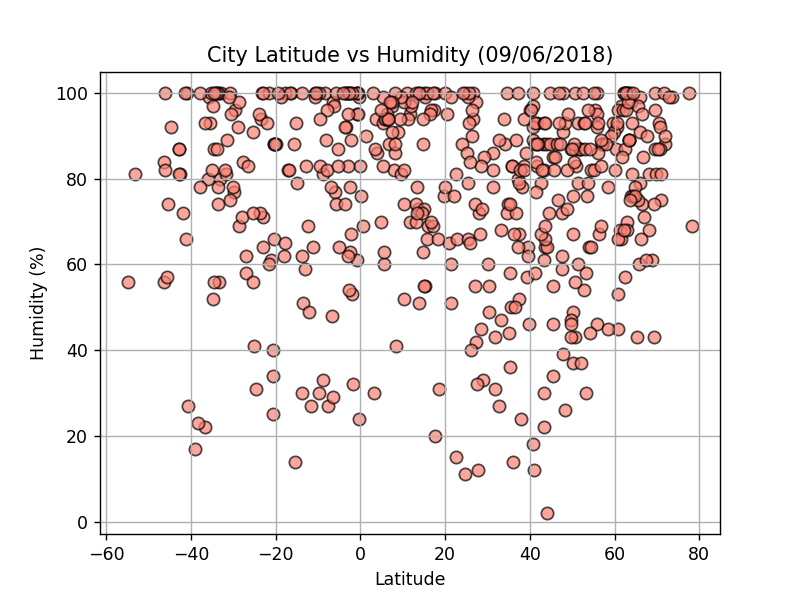

In [32]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_humid= plt.scatter(city_df["Lat"],city_df["Humidity"],s=50,marker="o", facecolors="salmon", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Humidity (09/06/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("Result/Lat_vs_Humidity.png")

# Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


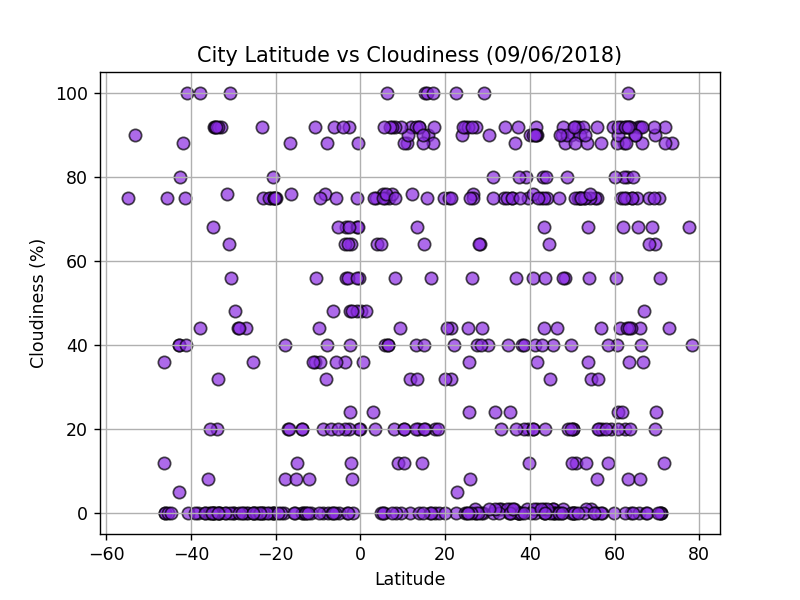

In [33]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_cloud= plt.scatter(city_df["Lat"],city_df["Cloudiness"],s=50,marker="o", facecolors="blueviolet", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Cloudiness (09/06/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("Result/Lat_vs_Cloudiness.png")

#  Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


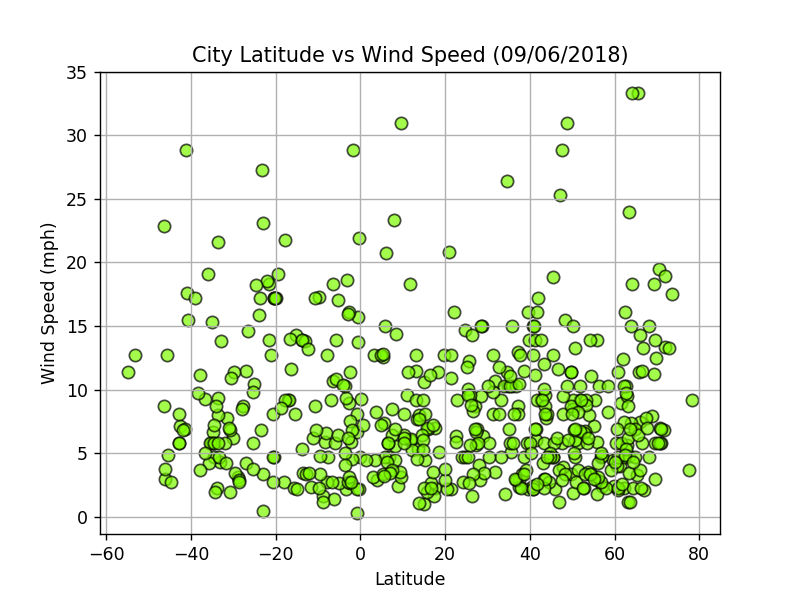

In [34]:
#draw scatter, set proper size, add grid, title, labels, and save the picture.
lat_wind= plt.scatter(city_df["Lat"],city_df["Wind Speed"],s=50,marker="o", facecolors="lawngreen", edgecolors="black"\
                      ,alpha =0.7)
plt.grid()
plt.title("City Latitude vs Wind Speed (09/06/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("Result/Lat_vs_WindSpeed.png")

# Observable Trends
* The closer the latitude of the city to 0 degree, the higher the tempature is.
* There is no obvious evidence that latitude has an effect on humidity, cloudiness, and wind speed.
* We can see that the highest tempatures occur at cities located around latitude 30 degree. This because that the date is 09/03. The latitude that receives 90 degree sunshine is still in the north of equator until 9/23.